# NLP Project analyzing works of Ancient Greek Poet Hesiod

Loading Text from Project Gutenberg .

test this line

In [84]:
print("is git working?")

is git working?


In [1]:
# import packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


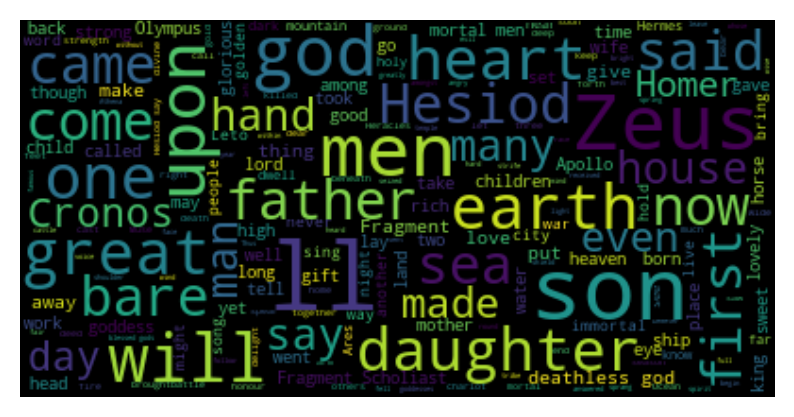

In [7]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open('hesoid.txt',encoding='utf-8').read()

# Generate a word cloud image
wordcloud = WordCloud(max_words=25).generate(text)
#wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               #random_state=1).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=50).generate(text)
plt.figure(figsize=(5,2.5),dpi=200)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud.png')
#plt.savefigure('filename.png', dpi=300)

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [ ]:
# Open File
# DO NOT RUN
f = open('hesoid.txt','r', encoding="utf8")
raw = f.read()



In [ ]:
# Tokenize 
tokens = nltk.word_tokenize(raw)
# Checking lenght
len(tokens)

In [ ]:
# List comprehension
tokens_without_sw = [word for word in tokens if not word in stopwords.words('english')]


In [ ]:
# checking length to confirm stopwords were removed
len(tokens_without_sw)

In [ ]:
#Tokenize sentences
sentences = sent_tokenize(raw)
#sentences

PUT sentences in DF


In [ ]:
from pandas import DataFrame
# Put tokenized sentences in dataframe

Hesiod = DataFrame (sentences,columns=['tokenized_sentences'])
Hesiod.sample(9)

In [ ]:
# new column for lenth of sentences
Hesiod["len"] = Hesiod['tokenized_sentences'].apply(len)

In [ ]:
# Visulization of sentence lenght
import matplotlib as plt
import seaborn as sns

In [ ]:
sns.distplot(Hesiod["len"], kde=False)

# Pre-Processing 
There are many feature engineering strategies for transforming text data into features. Some involve assigning each unique word-like term to a feature and counting the number of occurrences per training example. However, if we were to perform this strategy right now, we'd end up with an absurd number of features, a result of the myriad possible terms. The classifier would take too long to train and likely overfit. As a result, each NLP problem requires a tailored approach to determine which terms are relevant and meaningful, and this is where we begin our pre-processing.


can't get contractions installed

# Tokenization

Step 2: Tokenization

In this step, we construct the features. We will begin by breaking apart the corpus into a vocabulary of unique terms, and this is called tokanization.

We can tokenize individual terms and generate what's called a bag of words model. You may notice this model has a glaring pitfall: it fails to capture the innate structure of human language. We can also tokenize using nltk, which is the leading platform for building Python programs to work with human language data.

We will begin my installing and importing nltk, so we can use it!


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
Hesiod['word_tokens'] = Hesiod['tokenized_sentences'].apply(word_tokenize)
Hesiod.head()

In [ ]:
Hesiod['tokens_no_stopwords']= [word for word in tokens if not word in stopwords.words('english')]


In [ ]:
# make lowercase
Hesiod['lower'] = Hesiod['word_tokens'].apply(lambda x: [word.lower() for word in x])
Hesiod.head()

In [ ]:
# take out punctionation
import string
punc = string.punctuation
Hesiod['no_punc'] = Hesiod['lower'].apply(lambda x: [word for word in x if word not in punc])
Hesiod.head()

In [ ]:
# take outstop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

Hesiod['stopwords_removed'] = Hesiod['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
Hesiod.head()




Step 6: Stemming/Lemmatization

The idea of stemming is to reduce different forms of word usage into its root word. For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive” and very often researchers want to remove this variability from their corpus. Compared to lemmatization, stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root of the word. In other words, stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.

Instead of taking the easy way out with stemming, let’s apply lemmatization to our data but it requires some additional steps compared to stemming. First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word.


In [ ]:
# lemminization
nltk.download('averaged_perceptron_tagger')

In [ ]:
#POS tagging
Hesiod['pos_tags'] = Hesiod['stopwords_removed'].apply(nltk.tag.pos_tag)
Hesiod.sample(10)

We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion.

In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
Hesiod['wordnet_pos'] = Hesiod['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
Hesiod.head()

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wnl = WordNetLemmatizer()
Hesiod['lemmatized'] = Hesiod['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
Hesiod.sample(10)

In [ ]:
# Save to file!!!!
Hesiod.to_csv('Hesoid.csv')


In [ ]:
# write lemonized word to list???

lemons = Hesiod['lemmatized'].tolist()
lemons

In [82]:
for i in lemons:
    print(i[:8])

']
['last', 'third', 'opinion', 'prevail']
['turned', 'mirth', 'feast', 'believe', 'war', 'end']
['time', 'two', 'serpent', 'appear', 'destroyed', 'laocoon', 'one', 'two']
['sinon', 'raise', 'fire-signal', 'achaean', 'previously', 'get', 'city', 'pretence']
['greek', 'sail', 'tenedos', 'wooden', 'horse', 'come', 'fell', 'upon']
['neoptolemus', 'kill', 'priam', 'flee', 'altar', 'zeus', 'herceius', '1']
['greek', 'enrage', 'determine', 'stone', 'aias', 'escape', 'danger', 'threaten']
['greek', 'burn', 'city', 'sacrifice', 'polyxena', 'tomb', 'achilles', 'odysseus']
['demophon', 'acamas', 'find', 'aethra', 'take']
['lastly', 'greeks', 'sail', 'away', 'athena', 'plan', 'destroy', 'high']
['fragment', '2—dionysus', 'halicarn', 'rom']
['antiq']
[]
['68', 'accord', 'arctinus', 'one', 'palladium', 'give', 'dardanus', 'zeus']
['hidden', 'secret', 'place', 'copy', 'make', 'resemble', 'original', 'point']
['copy', 'achaean', 'take', 'result', 'plot']
['fragment', '3—scholiast', 'euripedes', 'andr

In [77]:
from collections import Counter

Counter(lemons).most_common()

TypeError: unhashable type: 'list'

In [ ]:
type(lemons)

In [ ]:
# for loop

for i in lemons:
   print(i)